In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

# Reshape and normalize pixel values
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1)).astype('float32') / 255.0
testX = testX.reshape((testX.shape[0], 28, 28, 1)).astype('float32') / 255.0

# One-hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    # Compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()

    kfold = KFold(n_folds, shuffle=True, random_state=1)

    for train_ix, test_ix in kfold.split(dataX):
        model = define_model()
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]

        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        _, acc = model.evaluate(testX, testY, verbose=0)

        print('> %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)

    return scores, histories


> 98.967
> 98.900
> 99.042
> 99.133
> 99.125


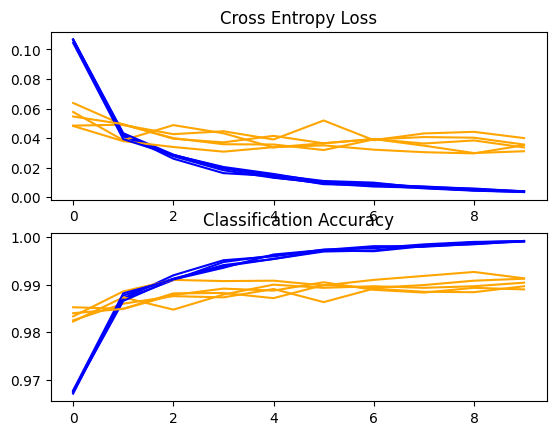

Accuracy: mean=99.033 std=0.090, n=5


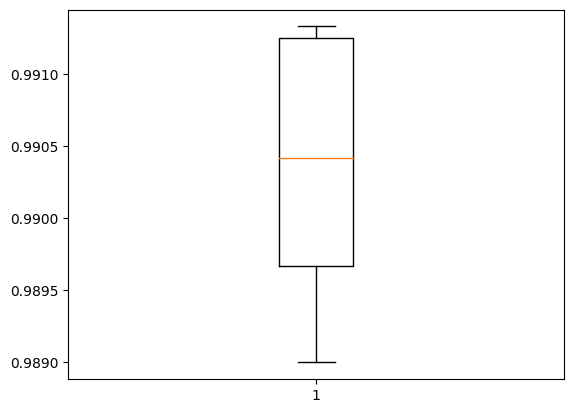

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test Accuracy: 99.160


In [ ]:
def run_test_harness():
    scores, histories = evaluate_model(trainX, trainY)

    # Learning curves
    for history in histories:
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(history.history['loss'], color='blue', label='train')
        plt.plot(history.history['val_loss'], color='orange', label='test')

        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(history.history['accuracy'], color='blue', label='train')
        plt.plot(history.history['val_accuracy'], color='orange', label='test')

    plt.show()

    # Summarize model performance
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))

    # Box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

# Run the test harness
run_test_harness()

# Save the final model
final_model = define_model()
final_model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
final_model.save('final_model.h5')

# Load the saved model and evaluate on the test dataset
loaded_model = load_model('final_model.h5')
_, test_accuracy = loaded_model.evaluate(testX, testY, verbose=0)
print('Test Accuracy: %.3f' % (test_accuracy * 100.0))


In [ ]:
from keras.preprocessing.image import load_img, img_to_array

def load_image(filename):
    img = load_img(filename, color_mode='grayscale', target_size=(28, 28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32') / 255.0
    return img

# Load an example image and make a prediction
img = load_image('/content/8.jpg')
prediction = loaded_model.predict(img)
predicted_class = prediction.argmax()

print('Predicted Digit: %d' % predicted_class)


1/1 [==============================] - 0s 21ms/step
Predicted Digit: 8


(-2.613411827399796, 2.55120755076255, -2.1065314371700974, 2.276859129168119)

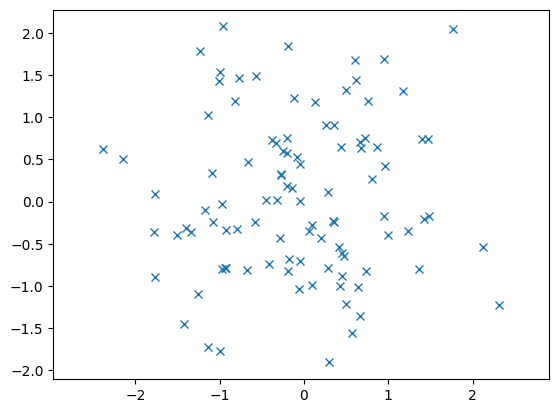

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
mean = [0,0]
cov = [[1,0], [0,1]]
x,y = np.random.multivariate_normal(mean, cov, 100).T
plt.plot(x,y,'x')
plt.axis('equal')

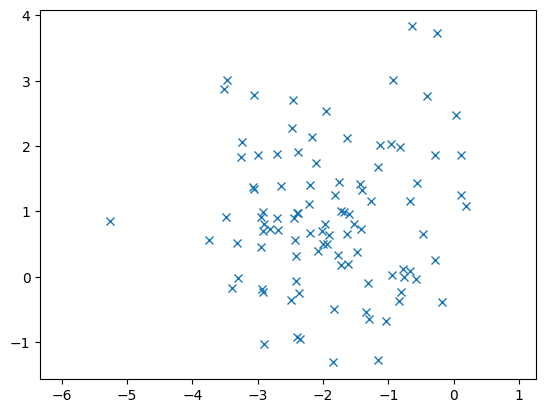

In [ ]:
mean = [~1,1]
x,y = np.random.multivariate_normal(mean, cov, 100).T
plt.plot(x,y,'x')
plt.axis('equal')
plt.show()

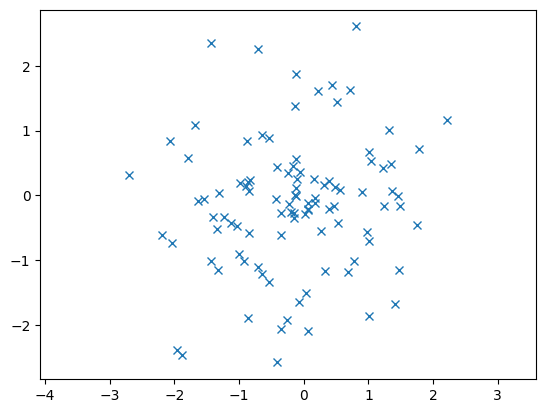

In [ ]:
mean = [0,0]

COV = [[2,0], [0,2]]

x,y = np.random.multivariate_normal(mean, cov, 100).T

plt.plot(x, y, 'x')

plt.axis('equal')

plt.show()

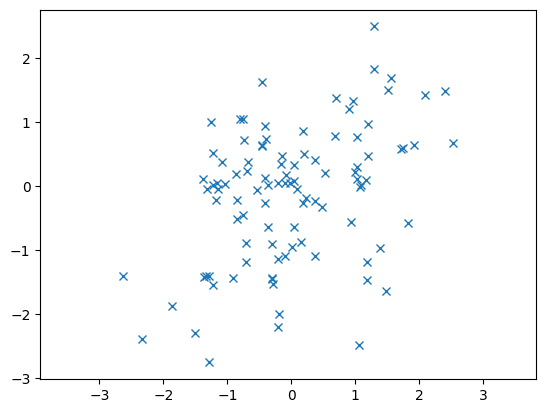

In [ ]:
mean = [0,0]

cov = [[1,0.5],[0.5,1]]

x,y = np.random.multivariate_normal(mean, cov, 100).T

plt.plot(x,y,'x')

plt.axis('equal')

plt.show()

# the points varies more along y=x

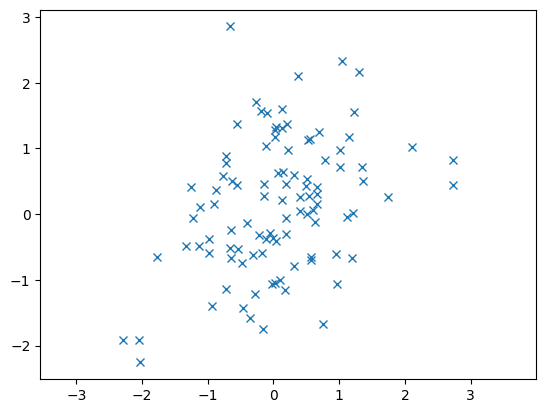

In [ ]:
mean = [0,0]
COV = [[1,-0.5],[-0.5,1]]
x,y = np.random.multivariate_normal (mean, cov, 100).T
plt.plot(x,y,'x')
plt.axis('equal')
plt.show()